In [ ]:
!pip install requests
!pip install BeautifulSoup
!pip install wordcloud


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import requests
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#url= 'https://en.wikipedia.org/wiki/Text_mining'
url= 'https://es.wikipedia.org/wiki/Ciencia_de_datos'
r =requests.get(url)

# Nube de palabra primera versión

In [ ]:
if r.status_code ==200:
  #procesar

  bs= BeautifulSoup(r.text,'lxml')
  #print(soupp.prettify())
  print(bs.get_text())
  print(bs.title)
  print(bs.link)
  print(bs.a)
else:
  ##informar solamente el error
  display('no se piiede conectar la  pagina' + url)
  raise 'No se pudo encontrar la pagina'+ url

'no se piiede conectar la  paginahttps://theconversation.com/inteligencia-artificial-para-recrear-espacios-literarios-inexistentes-226287'

TypeError: exceptions must derive from BaseException

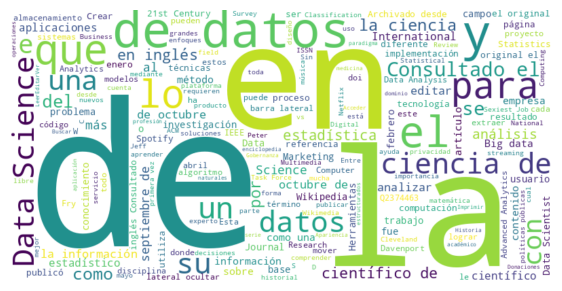

In [ ]:
if r.status_code ==200:
  #procesar

  texto = bs.getText()
  wc = WordCloud(width=800, height=400, background_color='white').generate(texto)
  plt.figure(figsize=(7,5))
  plt.axis('off')

  plt.imshow(wc,interpolation = 'bilinear')
  plt.show()

# Versión 2

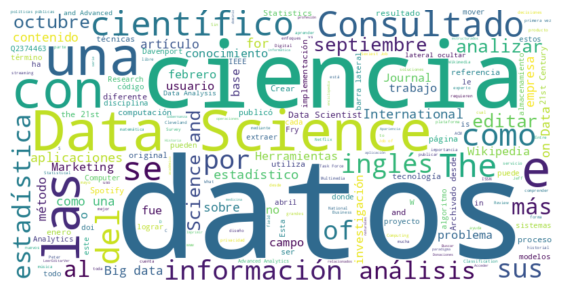

In [ ]:
if r.status_code ==200:
  #procesar

  texto = bs.getText()
  vacias=['el', 'lo', 'en', 'y', 'para', 'su', 'que', 'un','la', 'de','a','los']
  wc = WordCloud(width=800,
                 height=400,
                 background_color='white',
                 stopwords=vacias).generate(texto)
  plt.figure(figsize=(7,5))
  plt.axis('off')

  plt.imshow(wc,interpolation = 'bilinear')
  plt.show()

# Nube de palabras tercera versión

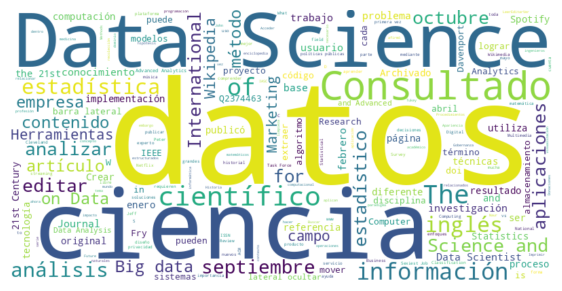

In [ ]:
if r.status_code ==200:
  #procesar

  texto = bs.getText()
  vacias=stopwords.words('spanish')
  wc = WordCloud(width=800,
                 height=400,
                 background_color='white',
                 stopwords=vacias).generate(texto)
  plt.figure(figsize=(7,5))
  plt.axis('off')

  plt.imshow(wc,interpolation = 'bilinear')
  plt.show()

cosndierendo stopwords en esp e  iingles

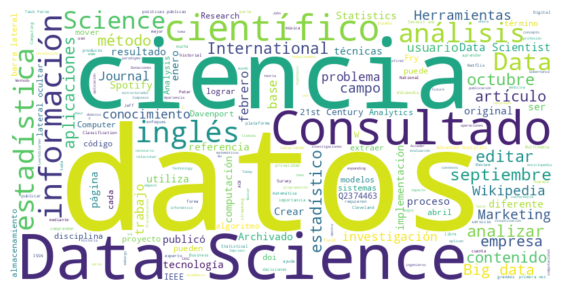

In [ ]:
if r.status_code ==200:
  #procesar

  texto = bs.getText()
  vacias_es=stopwords.words('spanish')
  vacias_en=stopwords.words('english')
  vacias = vacias_es.copy()
  vacias.extend(vacias_en)
  wc = WordCloud(width=800,
                 height=400,
                 background_color='white',
                 stopwords=vacias).generate(texto)
  plt.figure(figsize=(7,5))
  plt.axis('off')

  plt.imshow(wc,interpolation = 'bilinear')
  plt.show()

Se añade el parametro maxwords  para poner un limite de palabras en la nube

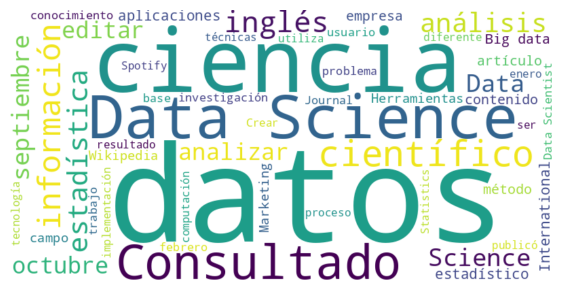

In [ ]:
if r.status_code ==200:
  #procesar

  texto = bs.getText()
  vacias_es=stopwords.words('spanish')
  vacias_en=stopwords.words('english')
  vacias = vacias_es.copy()
  vacias.extend(vacias_en)
  wc = WordCloud(width=800,
                 height=400,
                 background_color='white',
                 stopwords=vacias, max_words=50).generate(texto)
  plt.figure(figsize=(7,5))
  plt.axis('off')

  plt.imshow(wc,interpolation = 'bilinear')
  plt.show()

seleccionar 2 paginas y poner una nube de lado a lado con titulo

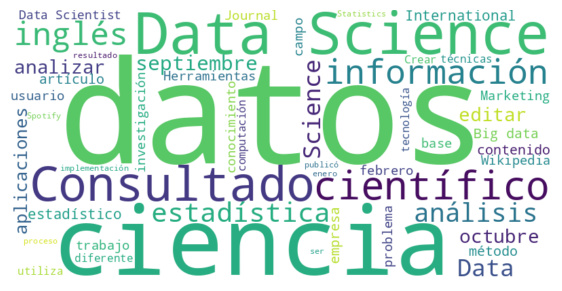

In [ ]:
urls= ['https://www.ieee.org/','https://es.wikipedia.org/wiki/Computaci%C3%B3n_gr%C3%A1fica']
for i in range(len(urls)):
  url = urls[i]
  r =requests.get(url)
  if r.status_code ==200:
    #procesar


    texto = bs.getText()
    vacias_es=stopwords.words('spanish')
    vacias_en=stopwords.words('english')
    vacias = vacias_es.copy()
    vacias.extend(vacias_en)
    wc = WordCloud(width=800,
                  height=400,
                  background_color='white',
                  stopwords=vacias, max_words=50).generate(texto)

    plt.figure(figsize=(7,5))
    plt.axis('off')

    plt.imshow(wc,interpolation = 'bilinear')
    plt.show()

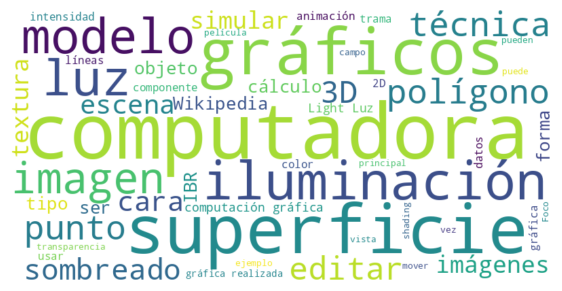

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Lista de URLs
urls = ['https://www.ieee.org/', 'https://es.wikipedia.org/wiki/Computaci%C3%B3n_gr%C3%A1fica']
imagennes = []  # Lista para almacenar las nubes de palabras

# Iterar sobre las URLs
for i in range(len(urls)):
    url = urls[i]
    r = requests.get(url)

    # Verificar si la solicitud fue exitosa
    if r.status_code == 200:
        # Procesar el contenido de la página
        soup = BeautifulSoup(r.text, 'html.parser')  # Crear instancia de BeautifulSoup
        texto = soup.get_text()  # Obtener el texto del contenido

        # Cargar stopwords en español e inglés
        vacias_es = stopwords.words('spanish')
        vacias_en = stopwords.words('english')
        vacias = vacias_es.copy()  # Crear una copia de las stopwords en español
        vacias.extend(vacias_en)  # Añadir las stopwords en inglés

        # Generar la nube de palabras
        wc = WordCloud(width=800,
                       height=400,
                       background_color='white',
                       stopwords=vacias,
                       max_words=50).generate(texto)

        # Añadir la nube de palabras a la lista de imágenes
        imagennes.append(wc)

# Mostrar todas las nubes de palabras almacenadas en la lista
for wc in imagennes:
    plt.figure(figsize=(7, 5))
    plt.axis('off')  # Ocultar los ejes
    plt.imshow(wc, interpolation='bilinear')
    plt.show()


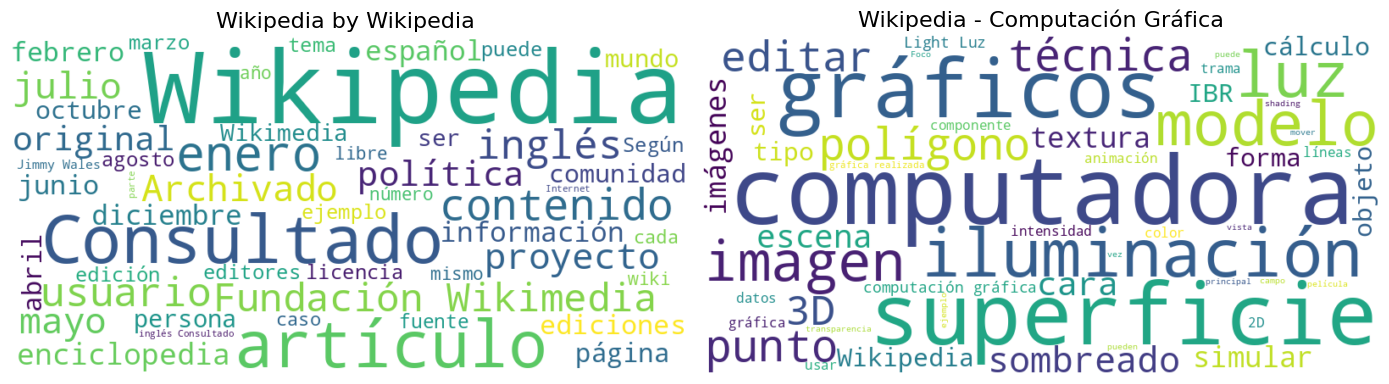

In [ ]:
# Lista de URLs y títulos
urls = ['https://es.wikipedia.org/wiki/Wikipedia', 'https://es.wikipedia.org/wiki/Computaci%C3%B3n_gr%C3%A1fica']
titulos = ['Wikipedia by Wikipedia ', 'Wikipedia - Computación Gráfica']
imagennes = []  # Lista para almacenar las nubes de palabras

# Iterar sobre las URLs
for i in range(len(urls)):
    url = urls[i]
    r = requests.get(url)

    # Verificar si la solicitud fue exitosa
    if r.status_code == 200:
        # Procesar el contenido de la página
        soup = BeautifulSoup(r.text, 'html.parser')  # Crear instancia de BeautifulSoup
        texto = soup.get_text()  # Obtener el texto del contenido

        # Cargar stopwords en español e inglés

        vacias = vacias_es.copy()  # Crear una copia de las stopwords en español
        vacias.extend(vacias_en)  # Añadir las stopwords en inglés

        # Generar la nube de palabras
        wc = WordCloud(width=800,
                       height=400,
                       background_color='white',
                       stopwords=vacias,
                       max_words=50).generate(texto)

        # Añadir la nube de palabras a la lista de imágenes
        imagennes.append(wc)

# Crear una figura con 2 subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Iterar sobre las nubes de palabras y mostrarlas
for i, wc in enumerate(imagennes):
    axs[i].imshow(wc, interpolation='bilinear')  # Mostrar la nube de palabras
    axs[i].axis('off')  # Ocultar los ejes
    axs[i].set_title(titulos[i], fontsize=16)  # Título para cada subplot

# Mostrar la figura con ambas nubes de palabras lado a lado
plt.tight_layout()
plt.show()

In [ ]:
texto ="Viva México"
texto_normalizado = texto.lower()
print (texto_normalizado)

viva méxico


In [ ]:
import re
texto = '¡Viva México, 100 veces, y más #súper!!!'
texto_normalizado = re.sub(r'[^\w\s]', '', texto)
print (texto_normalizado)

Viva México 100 veces y más súper


Eliminar pallabras vacias


In [ ]:
stop_words = set(stopwords.words('spanish'))
texto = '¡Viva México, el mejor país del mundo. El maíz es de México'
palabras = texto.split()
texto = ' '.join([palabra for palabra in palabras if palabra.lower() not in stop_words])
print(texto)

¡Viva México, mejor país mundo. maíz México


stemming funciona mejjor en ingles que en  español


In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
texto = "habló, hablar, hablaron, habllarán, hablarían"
palabras = texto.split()
texto_normalizado = ' '.join([stemmer.stem(palabra) for palabra in palabras])
print(texto_normalizado)

hablo, hablar, hablaron, habllaran, habl
